In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load metadata
metadata = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

# Check structure
print(metadata.head())
print("\nColumns:", metadata.columns.tolist())
print("\nDataset size:", len(metadata))

# Class distribution
print("\nClass distribution:")
print(metadata['dx'].value_counts())
print("\nPercentages:")
print(metadata['dx'].value_counts(normalize=True) * 100)


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

Columns: ['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']

Dataset size: 10015

Class distribution:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

Percentages:
dx
nv       66.949576
mel      11.113330
bkl      10.973540
bcc       5.132302
akiec     3.265102
vasc      1.417873
df        1.148278
Name: proportion, dtype: float64


Images found: 10015 / 10015

Class mapping:
0: akiec
1: bcc
2: bkl
3: df
4: mel
5: nv
6: vasc

=== Dataset Split ===
Training: 350 images
Validation: 4832 images
Test: 4833 images

Training set distribution:
dx
bkl      50
nv       50
df       50
mel      50
vasc     50
bcc      50
akiec    50
Name: count, dtype: int64

=== DataLoaders Ready ===

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 180MB/s] 



=== Training Baseline Classifier ===



Validation: 100%|██████████| 151/151 [00:38<00:00,  3.95it/s]


Epoch 1/50
Train Loss: 1.8091, Train Acc: 26.57%
Val Loss: 1.5882, Val Acc: 36.24%
✓ Saved best model (Val Acc: 36.24%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:25<00:00,  5.99it/s]


Epoch 2/50
Train Loss: 1.1116, Train Acc: 63.14%
Val Loss: 1.2458, Val Acc: 54.43%
✓ Saved best model (Val Acc: 54.43%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:25<00:00,  6.02it/s]


Epoch 3/50
Train Loss: 0.8230, Train Acc: 74.57%
Val Loss: 1.1230, Val Acc: 59.50%
✓ Saved best model (Val Acc: 59.50%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.32it/s]


Epoch 4/50
Train Loss: 0.6263, Train Acc: 81.43%
Val Loss: 1.0229, Val Acc: 61.47%
✓ Saved best model (Val Acc: 61.47%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.26it/s]


Epoch 5/50
Train Loss: 0.5421, Train Acc: 82.86%
Val Loss: 1.0281, Val Acc: 60.47%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.27it/s]


Epoch 6/50
Train Loss: 0.4359, Train Acc: 87.43%
Val Loss: 1.0641, Val Acc: 60.35%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.27it/s]


Epoch 7/50
Train Loss: 0.3623, Train Acc: 89.43%
Val Loss: 1.1547, Val Acc: 60.18%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.14it/s]


Epoch 8/50
Train Loss: 0.3137, Train Acc: 90.57%
Val Loss: 1.0865, Val Acc: 62.07%
✓ Saved best model (Val Acc: 62.07%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.33it/s]


Epoch 9/50
Train Loss: 0.2581, Train Acc: 92.86%
Val Loss: 1.0232, Val Acc: 65.07%
✓ Saved best model (Val Acc: 65.07%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.18it/s]


Epoch 10/50
Train Loss: 0.2074, Train Acc: 94.86%
Val Loss: 1.4639, Val Acc: 55.13%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.19it/s]


Epoch 11/50
Train Loss: 0.1835, Train Acc: 95.43%
Val Loss: 1.0282, Val Acc: 66.06%
✓ Saved best model (Val Acc: 66.06%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.35it/s]


Epoch 12/50
Train Loss: 0.1328, Train Acc: 97.43%
Val Loss: 1.1341, Val Acc: 62.91%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.11it/s]


Epoch 13/50
Train Loss: 0.1214, Train Acc: 96.86%
Val Loss: 1.3730, Val Acc: 59.75%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.16it/s]


Epoch 14/50
Train Loss: 0.0989, Train Acc: 98.57%
Val Loss: 1.1499, Val Acc: 65.02%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.22it/s]


Epoch 15/50
Train Loss: 0.1069, Train Acc: 98.00%
Val Loss: 0.9684, Val Acc: 68.81%
✓ Saved best model (Val Acc: 68.81%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.28it/s]


Epoch 16/50
Train Loss: 0.1183, Train Acc: 97.14%
Val Loss: 1.1889, Val Acc: 63.91%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.32it/s]


Epoch 17/50
Train Loss: 0.1031, Train Acc: 98.00%
Val Loss: 1.4773, Val Acc: 60.39%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.39it/s]


Epoch 18/50
Train Loss: 0.0746, Train Acc: 98.29%
Val Loss: 1.3564, Val Acc: 62.23%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.10it/s]


Epoch 19/50
Train Loss: 0.0751, Train Acc: 98.86%
Val Loss: 1.3299, Val Acc: 62.69%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.30it/s]


Epoch 20/50
Train Loss: 0.0505, Train Acc: 99.14%
Val Loss: 1.3512, Val Acc: 62.56%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.24it/s]


Epoch 21/50
Train Loss: 0.0602, Train Acc: 99.14%
Val Loss: 1.3187, Val Acc: 62.87%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.35it/s]


Epoch 22/50
Train Loss: 0.0441, Train Acc: 99.43%
Val Loss: 1.4084, Val Acc: 62.69%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.44it/s]


Epoch 23/50
Train Loss: 0.0256, Train Acc: 100.00%
Val Loss: 1.4457, Val Acc: 62.07%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.45it/s]


Epoch 24/50
Train Loss: 0.0280, Train Acc: 100.00%
Val Loss: 1.3717, Val Acc: 63.85%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.38it/s]


Epoch 25/50
Train Loss: 0.0359, Train Acc: 99.14%
Val Loss: 1.2306, Val Acc: 65.83%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.42it/s]


Epoch 26/50
Train Loss: 0.0293, Train Acc: 99.71%
Val Loss: 1.4779, Val Acc: 62.29%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.45it/s]


Epoch 27/50
Train Loss: 0.0398, Train Acc: 98.86%
Val Loss: 1.4846, Val Acc: 62.60%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.35it/s]


Epoch 28/50
Train Loss: 0.0509, Train Acc: 99.14%
Val Loss: 1.4716, Val Acc: 62.56%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.31it/s]


Epoch 29/50
Train Loss: 0.0296, Train Acc: 99.71%
Val Loss: 1.3054, Val Acc: 65.11%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.40it/s]


Epoch 30/50
Train Loss: 0.0370, Train Acc: 99.14%
Val Loss: 1.4860, Val Acc: 62.40%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.32it/s]


Epoch 31/50
Train Loss: 0.0350, Train Acc: 99.43%
Val Loss: 1.4789, Val Acc: 61.57%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.24it/s]


Epoch 32/50
Train Loss: 0.0346, Train Acc: 99.71%
Val Loss: 1.2397, Val Acc: 66.31%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.39it/s]


Epoch 33/50
Train Loss: 0.0421, Train Acc: 99.14%
Val Loss: 1.2726, Val Acc: 66.27%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.31it/s]


Epoch 34/50
Train Loss: 0.0296, Train Acc: 99.43%
Val Loss: 1.4219, Val Acc: 63.47%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.42it/s]


Epoch 35/50
Train Loss: 0.0282, Train Acc: 99.43%
Val Loss: 1.5301, Val Acc: 62.33%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.32it/s]


Epoch 36/50
Train Loss: 0.0170, Train Acc: 100.00%
Val Loss: 1.4569, Val Acc: 63.33%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.43it/s]


Epoch 37/50
Train Loss: 0.0356, Train Acc: 99.14%
Val Loss: 1.3567, Val Acc: 65.44%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.43it/s]


Epoch 38/50
Train Loss: 0.0299, Train Acc: 99.71%
Val Loss: 1.2635, Val Acc: 67.18%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.38it/s]


Epoch 39/50
Train Loss: 0.0193, Train Acc: 99.71%
Val Loss: 1.3539, Val Acc: 64.55%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.41it/s]


Epoch 40/50
Train Loss: 0.0208, Train Acc: 100.00%
Val Loss: 1.6236, Val Acc: 61.67%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.43it/s]


Epoch 41/50
Train Loss: 0.0196, Train Acc: 100.00%
Val Loss: 1.5570, Val Acc: 62.69%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.36it/s]


Epoch 42/50
Train Loss: 0.0114, Train Acc: 99.71%
Val Loss: 1.4296, Val Acc: 64.26%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.50it/s]


Epoch 43/50
Train Loss: 0.0171, Train Acc: 100.00%
Val Loss: 1.4857, Val Acc: 63.85%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.19it/s]


Epoch 44/50
Train Loss: 0.0101, Train Acc: 100.00%
Val Loss: 1.5819, Val Acc: 62.67%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.37it/s]


Epoch 45/50
Train Loss: 0.0312, Train Acc: 99.43%
Val Loss: 1.6137, Val Acc: 61.32%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.34it/s]


Epoch 46/50
Train Loss: 0.0129, Train Acc: 99.71%
Val Loss: 1.4255, Val Acc: 65.13%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.43it/s]


Epoch 47/50
Train Loss: 0.0289, Train Acc: 99.43%
Val Loss: 1.3297, Val Acc: 66.91%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.32it/s]


Epoch 48/50
Train Loss: 0.0376, Train Acc: 98.86%
Val Loss: 1.5554, Val Acc: 62.79%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.39it/s]


Epoch 49/50
Train Loss: 0.0238, Train Acc: 99.43%
Val Loss: 1.5929, Val Acc: 63.14%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.28it/s]


Epoch 50/50
Train Loss: 0.0273, Train Acc: 99.71%
Val Loss: 1.8998, Val Acc: 60.20%
--------------------------------------------------

=== Training Complete ===
Best Validation Accuracy: 68.81%


Testing: 100%|██████████| 152/152 [00:37<00:00,  4.03it/s]



=== Test Set Evaluation ===

              precision    recall  f1-score   support

       akiec       0.38      0.52      0.44       138
         bcc       0.48      0.57      0.52       232
         bkl       0.48      0.42      0.45       525
          df       0.18      0.84      0.30        32
         mel       0.33      0.58      0.42       532
          nv       0.94      0.75      0.84      3328
        vasc       0.26      0.91      0.41        46

    accuracy                           0.68      4833
   macro avg       0.44      0.66      0.48      4833
weighted avg       0.77      0.68      0.71      4833



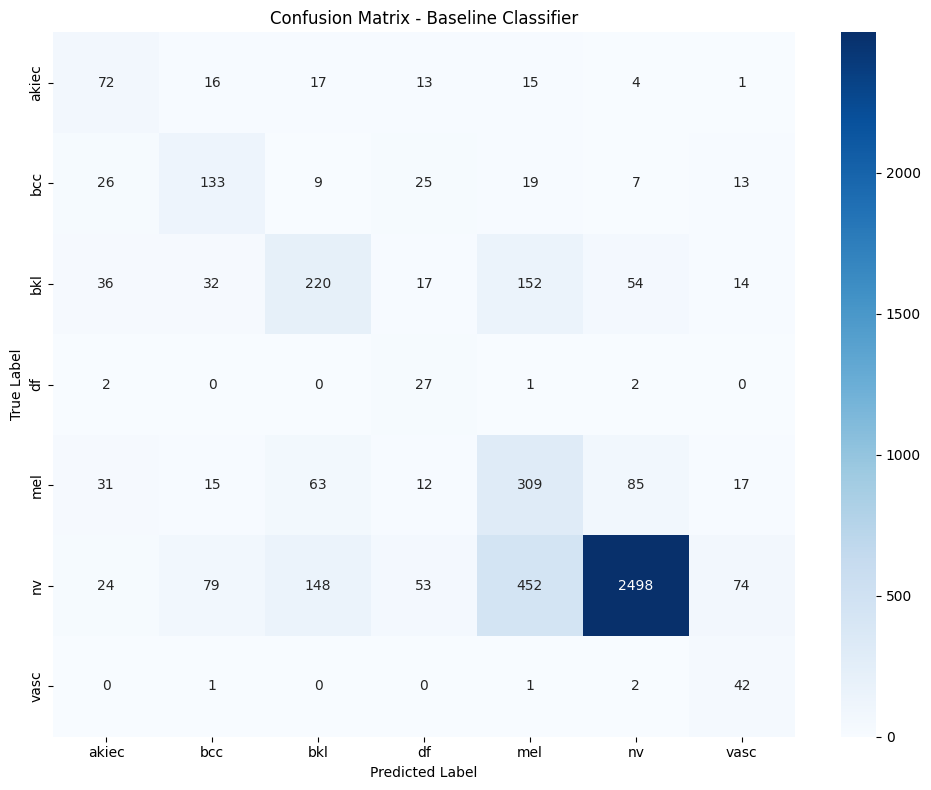

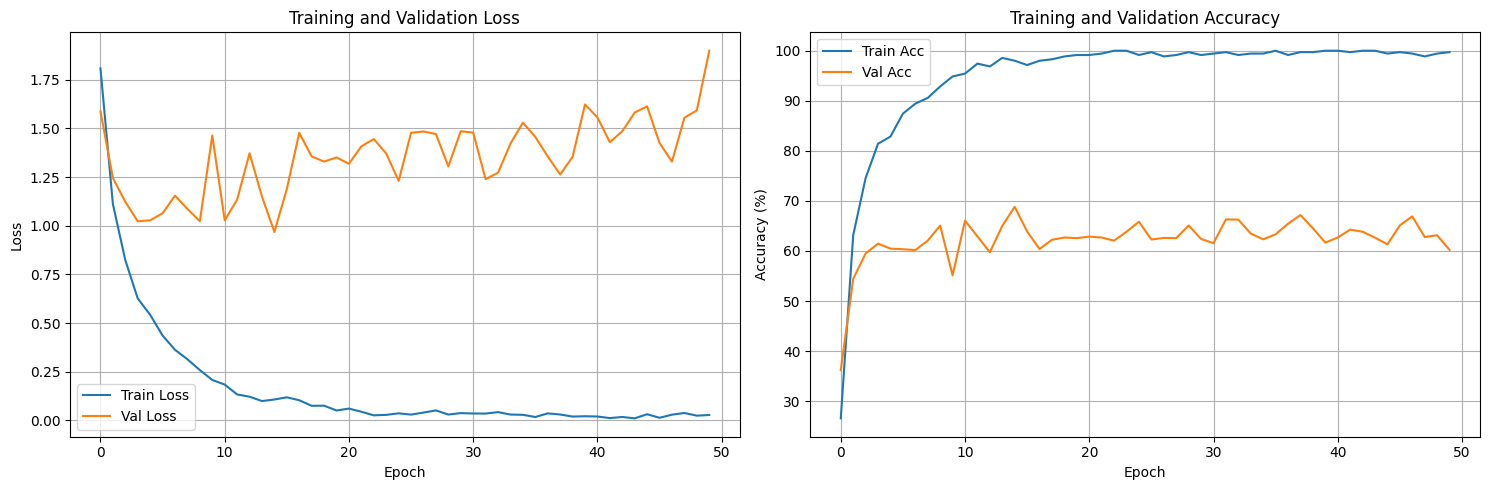


✓ Baseline model saved as: best_baseline_model.pth
✓ Metrics saved as PNG files


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

# ============================
# 1. DATA PREPARATION
# ============================

# Load metadata
metadata = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

# Image paths (adjust based on your directory structure)
image_dir_1 = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'
image_dir_2 = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2'

# Function to get full image path
def get_image_path(image_id):
    path1 = os.path.join(image_dir_1, f"{image_id}.jpg")
    path2 = os.path.join(image_dir_2, f"{image_id}.jpg")
    if os.path.exists(path1):
        return path1
    elif os.path.exists(path2):
        return path2
    else:
        return None

metadata['path'] = metadata['image_id'].apply(get_image_path)

# Verify all images exist
print(f"Images found: {metadata['path'].notna().sum()} / {len(metadata)}")

# Class encoding
class_to_idx = {cls: idx for idx, cls in enumerate(sorted(metadata['dx'].unique()))}
idx_to_class = {idx: cls for cls, idx in class_to_idx.items()}
metadata['label'] = metadata['dx'].map(class_to_idx)

print("\nClass mapping:")
for cls, idx in class_to_idx.items():
    print(f"{idx}: {cls}")

# ============================
# 2. FEW-SHOT SPLIT (50 per class)
# ============================

def create_few_shot_split(df, n_samples_per_class=50, val_size=0.15, test_size=0.15):
    """
    Create balanced few-shot training set + validation + test sets
    """
    train_dfs = []
    remaining_dfs = []
    
    for class_name in df['dx'].unique():
        class_df = df[df['dx'] == class_name].copy()
        
        # Sample n_samples for training
        if len(class_df) >= n_samples_per_class:
            train_sample = class_df.sample(n=n_samples_per_class, random_state=42)
        else:
            print(f"Warning: {class_name} has only {len(class_df)} samples")
            train_sample = class_df
        
        train_dfs.append(train_sample)
        
        # Remaining for val/test
        remaining = class_df[~class_df.index.isin(train_sample.index)]
        remaining_dfs.append(remaining)
    
    train_df = pd.concat(train_dfs, ignore_index=True)
    remaining_df = pd.concat(remaining_dfs, ignore_index=True)
    
    # Split remaining into val and test
    val_df, test_df = train_test_split(
        remaining_df, 
        test_size=test_size/(val_size+test_size),
        stratify=remaining_df['dx'],
        random_state=42
    )
    
    return train_df, val_df, test_df

# Create splits
train_df, val_df, test_df = create_few_shot_split(metadata, n_samples_per_class=50)

print(f"\n=== Dataset Split ===")
print(f"Training: {len(train_df)} images")
print(f"Validation: {len(val_df)} images")
print(f"Test: {len(test_df)} images")

print("\nTraining set distribution:")
print(train_df['dx'].value_counts())

# ============================
# 3. DATASET CLASS
# ============================

class HAM10000Dataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'path']
        image = Image.open(img_path).convert('RGB')
        label = self.df.loc[idx, 'label']
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Data transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = HAM10000Dataset(train_df, transform=train_transform)
val_dataset = HAM10000Dataset(val_df, transform=val_transform)
test_dataset = HAM10000Dataset(test_df, transform=val_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print("\n=== DataLoaders Ready ===")

# ============================
# 4. BASELINE CLASSIFIER
# ============================

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

# Model: ResNet18 pretrained
model = models.resnet18(pretrained=True)
num_classes = len(class_to_idx)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ============================
# 5. TRAINING LOOP
# ============================

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(loader, desc="Training"):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    return running_loss / len(loader), 100. * correct / total

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return running_loss / len(loader), 100. * correct / total

# Training
num_epochs = 50
best_val_acc = 0.0

history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

print("\n=== Training Baseline Classifier ===\n")

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate(model, val_loader, criterion, device)
    
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_baseline_model.pth')
        print(f"✓ Saved best model (Val Acc: {val_acc:.2f}%)")
    
    print("-" * 50)

print(f"\n=== Training Complete ===")
print(f"Best Validation Accuracy: {best_val_acc:.2f}%")

# ============================
# 6. EVALUATION
# ============================

# Load best model
model.load_state_dict(torch.load('best_baseline_model.pth'))

def evaluate_model(model, loader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Testing"):
            images = images.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    # Classification report
    print("\n=== Test Set Evaluation ===\n")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix - Baseline Classifier')
    plt.tight_layout()
    plt.savefig('baseline_confusion_matrix.png', dpi=150)
    plt.show()

class_names = [idx_to_class[i] for i in range(len(idx_to_class))]
evaluate_model(model, test_loader, device, class_names)

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history['train_loss'], label='Train Loss')
ax1.plot(history['val_loss'], label='Val Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True)

ax2.plot(history['train_acc'], label='Train Acc')
ax2.plot(history['val_acc'], label='Val Acc')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('baseline_training_history.png', dpi=150)
plt.show()

print("\n✓ Baseline model saved as: best_baseline_model.pth")
print("✓ Metrics saved as PNG files")

Using device: cuda
GAN training on 350 images

=== Model Architecture ===
Generator parameters: 2,454,836
Discriminator parameters: 2,906,817

=== Starting GAN Training ===



Epoch 1/100: 100%|██████████| 10/10 [00:02<00:00,  4.87it/s, D_loss=0.7010, G_loss=1.0568, D(x)=0.54, D(G(z))=0.41]



Epoch 1/100
G_loss: 0.9734, D_loss: 0.6766
D_real_acc: 64.69%, D_fake_acc: 60.00%
----------------------------------------------------------------------


Epoch 2/100: 100%|██████████| 10/10 [00:01<00:00,  5.42it/s, D_loss=0.8727, G_loss=1.2090, D(x)=0.61, D(G(z))=0.64]



Epoch 2/100
G_loss: 1.1003, D_loss: 0.7197
D_real_acc: 57.81%, D_fake_acc: 55.62%
----------------------------------------------------------------------


Epoch 3/100: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s, D_loss=0.7672, G_loss=1.3007, D(x)=0.44, D(G(z))=0.31]



Epoch 3/100
G_loss: 1.3729, D_loss: 0.8416
D_real_acc: 51.56%, D_fake_acc: 53.75%
----------------------------------------------------------------------


Epoch 4/100: 100%|██████████| 10/10 [00:01<00:00,  5.50it/s, D_loss=0.6893, G_loss=0.9315, D(x)=0.60, D(G(z))=0.41]



Epoch 4/100
G_loss: 1.2150, D_loss: 0.7856
D_real_acc: 55.62%, D_fake_acc: 62.81%
----------------------------------------------------------------------


Epoch 5/100: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s, D_loss=0.7775, G_loss=1.5245, D(x)=0.47, D(G(z))=0.44]



Epoch 5/100
G_loss: 1.3924, D_loss: 0.7679
D_real_acc: 58.44%, D_fake_acc: 54.69%
----------------------------------------------------------------------


Epoch 6/100: 100%|██████████| 10/10 [00:01<00:00,  5.85it/s, D_loss=0.6583, G_loss=1.3193, D(x)=0.67, D(G(z))=0.45]



Epoch 6/100
G_loss: 1.1410, D_loss: 0.7509
D_real_acc: 56.88%, D_fake_acc: 58.13%
----------------------------------------------------------------------


Epoch 7/100: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s, D_loss=0.6491, G_loss=1.4476, D(x)=0.58, D(G(z))=0.40]



Epoch 7/100
G_loss: 1.4535, D_loss: 0.8508
D_real_acc: 50.00%, D_fake_acc: 54.06%
----------------------------------------------------------------------


Epoch 8/100: 100%|██████████| 10/10 [00:01<00:00,  5.41it/s, D_loss=0.7096, G_loss=1.2334, D(x)=0.64, D(G(z))=0.51]



Epoch 8/100
G_loss: 1.3214, D_loss: 0.7214
D_real_acc: 65.62%, D_fake_acc: 57.19%
----------------------------------------------------------------------


Epoch 9/100: 100%|██████████| 10/10 [00:01<00:00,  5.51it/s, D_loss=0.5864, G_loss=1.2617, D(x)=0.60, D(G(z))=0.31]



Epoch 9/100
G_loss: 1.2406, D_loss: 0.6885
D_real_acc: 64.38%, D_fake_acc: 67.19%
----------------------------------------------------------------------


Epoch 10/100: 100%|██████████| 10/10 [00:01<00:00,  5.58it/s, D_loss=0.7097, G_loss=1.0435, D(x)=0.61, D(G(z))=0.50]



Epoch 10/100
G_loss: 1.1497, D_loss: 0.6709
D_real_acc: 68.44%, D_fake_acc: 62.50%
----------------------------------------------------------------------


Epoch 11/100: 100%|██████████| 10/10 [00:01<00:00,  5.59it/s, D_loss=0.7856, G_loss=1.2539, D(x)=0.55, D(G(z))=0.47]



Epoch 11/100
G_loss: 1.0993, D_loss: 0.7692
D_real_acc: 55.00%, D_fake_acc: 56.25%
----------------------------------------------------------------------


Epoch 12/100: 100%|██████████| 10/10 [00:01<00:00,  5.92it/s, D_loss=0.7932, G_loss=1.0379, D(x)=0.55, D(G(z))=0.47]



Epoch 12/100
G_loss: 1.1771, D_loss: 0.7292
D_real_acc: 60.62%, D_fake_acc: 59.69%
----------------------------------------------------------------------


Epoch 13/100: 100%|██████████| 10/10 [00:01<00:00,  5.27it/s, D_loss=0.6689, G_loss=1.5770, D(x)=0.58, D(G(z))=0.41]



Epoch 13/100
G_loss: 1.2793, D_loss: 0.7377
D_real_acc: 62.19%, D_fake_acc: 55.62%
----------------------------------------------------------------------


Epoch 14/100: 100%|██████████| 10/10 [00:01<00:00,  5.44it/s, D_loss=0.7231, G_loss=1.1962, D(x)=0.52, D(G(z))=0.45]



Epoch 14/100
G_loss: 1.4392, D_loss: 0.7802
D_real_acc: 51.25%, D_fake_acc: 60.00%
----------------------------------------------------------------------


Epoch 15/100: 100%|██████████| 10/10 [00:01<00:00,  5.58it/s, D_loss=0.5859, G_loss=1.2517, D(x)=0.69, D(G(z))=0.41]



Epoch 15/100
G_loss: 1.2616, D_loss: 0.6922
D_real_acc: 62.81%, D_fake_acc: 65.31%
----------------------------------------------------------------------


Epoch 16/100: 100%|██████████| 10/10 [00:01<00:00,  5.68it/s, D_loss=0.6701, G_loss=1.4476, D(x)=0.68, D(G(z))=0.47]



Epoch 16/100
G_loss: 1.3420, D_loss: 0.7998
D_real_acc: 61.56%, D_fake_acc: 53.75%
----------------------------------------------------------------------


Epoch 17/100: 100%|██████████| 10/10 [00:01<00:00,  5.67it/s, D_loss=0.6443, G_loss=1.0817, D(x)=0.60, D(G(z))=0.42]



Epoch 17/100
G_loss: 1.0031, D_loss: 0.7974
D_real_acc: 50.00%, D_fake_acc: 52.50%
----------------------------------------------------------------------


Epoch 18/100: 100%|██████████| 10/10 [00:01<00:00,  5.61it/s, D_loss=0.6594, G_loss=1.1373, D(x)=0.56, D(G(z))=0.40]



Epoch 18/100
G_loss: 1.0928, D_loss: 0.6979
D_real_acc: 58.75%, D_fake_acc: 64.69%
----------------------------------------------------------------------


Epoch 19/100: 100%|██████████| 10/10 [00:01<00:00,  5.49it/s, D_loss=0.6749, G_loss=1.3034, D(x)=0.51, D(G(z))=0.41]



Epoch 19/100
G_loss: 1.0987, D_loss: 0.7338
D_real_acc: 56.88%, D_fake_acc: 54.37%
----------------------------------------------------------------------


Epoch 20/100: 100%|██████████| 10/10 [00:01<00:00,  5.53it/s, D_loss=0.6359, G_loss=0.7818, D(x)=0.58, D(G(z))=0.38]



Epoch 20/100
G_loss: 1.1179, D_loss: 0.6911
D_real_acc: 62.19%, D_fake_acc: 69.06%
----------------------------------------------------------------------


Epoch 21/100: 100%|██████████| 10/10 [00:01<00:00,  5.15it/s, D_loss=0.6680, G_loss=1.1054, D(x)=0.57, D(G(z))=0.40]



Epoch 21/100
G_loss: 1.0702, D_loss: 0.7215
D_real_acc: 58.75%, D_fake_acc: 57.50%
----------------------------------------------------------------------


Epoch 22/100: 100%|██████████| 10/10 [00:01<00:00,  5.38it/s, D_loss=0.7486, G_loss=0.9496, D(x)=0.53, D(G(z))=0.49]



Epoch 22/100
G_loss: 1.1720, D_loss: 0.7522
D_real_acc: 54.06%, D_fake_acc: 57.19%
----------------------------------------------------------------------


Epoch 23/100: 100%|██████████| 10/10 [00:01<00:00,  5.53it/s, D_loss=0.7400, G_loss=1.0453, D(x)=0.54, D(G(z))=0.42]



Epoch 23/100
G_loss: 1.0714, D_loss: 0.7308
D_real_acc: 59.69%, D_fake_acc: 55.31%
----------------------------------------------------------------------


Epoch 24/100: 100%|██████████| 10/10 [00:01<00:00,  5.24it/s, D_loss=0.7408, G_loss=1.0544, D(x)=0.56, D(G(z))=0.50]



Epoch 24/100
G_loss: 1.0675, D_loss: 0.7056
D_real_acc: 62.19%, D_fake_acc: 56.88%
----------------------------------------------------------------------


Epoch 25/100: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s, D_loss=0.7975, G_loss=0.9215, D(x)=0.51, D(G(z))=0.45]



Epoch 25/100
G_loss: 1.1138, D_loss: 0.7418
D_real_acc: 51.88%, D_fake_acc: 62.19%
----------------------------------------------------------------------


Epoch 26/100: 100%|██████████| 10/10 [00:01<00:00,  5.59it/s, D_loss=0.7569, G_loss=0.8448, D(x)=0.53, D(G(z))=0.46]



Epoch 26/100
G_loss: 1.0981, D_loss: 0.6901
D_real_acc: 62.81%, D_fake_acc: 62.19%
----------------------------------------------------------------------


Epoch 27/100: 100%|██████████| 10/10 [00:01<00:00,  5.55it/s, D_loss=0.7223, G_loss=1.3049, D(x)=0.51, D(G(z))=0.43]



Epoch 27/100
G_loss: 1.1628, D_loss: 0.7265
D_real_acc: 59.69%, D_fake_acc: 55.62%
----------------------------------------------------------------------


Epoch 28/100: 100%|██████████| 10/10 [00:01<00:00,  5.45it/s, D_loss=0.7717, G_loss=0.9088, D(x)=0.59, D(G(z))=0.56]



Epoch 28/100
G_loss: 1.0909, D_loss: 0.7550
D_real_acc: 55.94%, D_fake_acc: 58.13%
----------------------------------------------------------------------


Epoch 29/100: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s, D_loss=0.6411, G_loss=1.0385, D(x)=0.56, D(G(z))=0.37]



Epoch 29/100
G_loss: 1.1641, D_loss: 0.6557
D_real_acc: 63.12%, D_fake_acc: 68.12%
----------------------------------------------------------------------


Epoch 30/100: 100%|██████████| 10/10 [00:01<00:00,  5.31it/s, D_loss=0.7648, G_loss=1.0779, D(x)=0.58, D(G(z))=0.52]



Epoch 30/100
G_loss: 0.9991, D_loss: 0.7107
D_real_acc: 58.44%, D_fake_acc: 56.56%
----------------------------------------------------------------------


Epoch 31/100: 100%|██████████| 10/10 [00:01<00:00,  5.56it/s, D_loss=0.6926, G_loss=1.0282, D(x)=0.54, D(G(z))=0.45]



Epoch 31/100
G_loss: 1.0511, D_loss: 0.6882
D_real_acc: 57.81%, D_fake_acc: 62.19%
----------------------------------------------------------------------


Epoch 32/100: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s, D_loss=0.8573, G_loss=0.8701, D(x)=0.50, D(G(z))=0.55]



Epoch 32/100
G_loss: 1.0927, D_loss: 0.6992
D_real_acc: 60.62%, D_fake_acc: 60.94%
----------------------------------------------------------------------


Epoch 33/100: 100%|██████████| 10/10 [00:01<00:00,  5.31it/s, D_loss=0.6332, G_loss=1.1214, D(x)=0.58, D(G(z))=0.40]



Epoch 33/100
G_loss: 1.0600, D_loss: 0.7468
D_real_acc: 58.75%, D_fake_acc: 52.81%
----------------------------------------------------------------------


Epoch 34/100: 100%|██████████| 10/10 [00:01<00:00,  5.51it/s, D_loss=0.7767, G_loss=1.0652, D(x)=0.58, D(G(z))=0.53]



Epoch 34/100
G_loss: 1.1907, D_loss: 0.7132
D_real_acc: 59.69%, D_fake_acc: 56.25%
----------------------------------------------------------------------


Epoch 35/100: 100%|██████████| 10/10 [00:01<00:00,  5.45it/s, D_loss=0.7140, G_loss=1.2204, D(x)=0.53, D(G(z))=0.46]



Epoch 35/100
G_loss: 1.1569, D_loss: 0.7139
D_real_acc: 59.06%, D_fake_acc: 56.56%
----------------------------------------------------------------------


Epoch 36/100: 100%|██████████| 10/10 [00:01<00:00,  5.60it/s, D_loss=0.7495, G_loss=1.1126, D(x)=0.64, D(G(z))=0.54]



Epoch 36/100
G_loss: 1.0572, D_loss: 0.7197
D_real_acc: 62.19%, D_fake_acc: 55.31%
----------------------------------------------------------------------


Epoch 37/100: 100%|██████████| 10/10 [00:01<00:00,  5.43it/s, D_loss=0.6307, G_loss=1.1533, D(x)=0.65, D(G(z))=0.45]



Epoch 37/100
G_loss: 1.0724, D_loss: 0.6756
D_real_acc: 62.19%, D_fake_acc: 61.25%
----------------------------------------------------------------------


Epoch 38/100: 100%|██████████| 10/10 [00:01<00:00,  5.37it/s, D_loss=0.6680, G_loss=0.9228, D(x)=0.59, D(G(z))=0.44]



Epoch 38/100
G_loss: 1.0433, D_loss: 0.7248
D_real_acc: 50.62%, D_fake_acc: 60.62%
----------------------------------------------------------------------


Epoch 39/100: 100%|██████████| 10/10 [00:01<00:00,  5.88it/s, D_loss=0.7767, G_loss=0.9499, D(x)=0.56, D(G(z))=0.54]



Epoch 39/100
G_loss: 0.9805, D_loss: 0.6787
D_real_acc: 66.56%, D_fake_acc: 63.12%
----------------------------------------------------------------------


Epoch 40/100: 100%|██████████| 10/10 [00:01<00:00,  5.47it/s, D_loss=0.6937, G_loss=1.0183, D(x)=0.59, D(G(z))=0.48]



Epoch 40/100
G_loss: 0.9695, D_loss: 0.7083
D_real_acc: 59.69%, D_fake_acc: 56.25%
----------------------------------------------------------------------


Epoch 41/100: 100%|██████████| 10/10 [00:01<00:00,  5.62it/s, D_loss=0.6385, G_loss=0.9981, D(x)=0.53, D(G(z))=0.36]



Epoch 41/100
G_loss: 1.0498, D_loss: 0.6898
D_real_acc: 60.62%, D_fake_acc: 60.31%
----------------------------------------------------------------------


Epoch 42/100: 100%|██████████| 10/10 [00:01<00:00,  5.60it/s, D_loss=0.7140, G_loss=1.0377, D(x)=0.55, D(G(z))=0.47]



Epoch 42/100
G_loss: 0.9650, D_loss: 0.7052
D_real_acc: 54.37%, D_fake_acc: 61.88%
----------------------------------------------------------------------


Epoch 43/100: 100%|██████████| 10/10 [00:01<00:00,  5.36it/s, D_loss=0.6345, G_loss=1.2629, D(x)=0.62, D(G(z))=0.44]



Epoch 43/100
G_loss: 1.0869, D_loss: 0.7089
D_real_acc: 62.19%, D_fake_acc: 55.00%
----------------------------------------------------------------------


Epoch 44/100: 100%|██████████| 10/10 [00:01<00:00,  5.57it/s, D_loss=0.7152, G_loss=1.1657, D(x)=0.53, D(G(z))=0.43]



Epoch 44/100
G_loss: 1.0396, D_loss: 0.7624
D_real_acc: 48.75%, D_fake_acc: 55.31%
----------------------------------------------------------------------


Epoch 45/100: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s, D_loss=0.6686, G_loss=1.0588, D(x)=0.58, D(G(z))=0.45]



Epoch 45/100
G_loss: 1.0712, D_loss: 0.7267
D_real_acc: 59.38%, D_fake_acc: 57.81%
----------------------------------------------------------------------


Epoch 46/100: 100%|██████████| 10/10 [00:01<00:00,  5.43it/s, D_loss=0.6851, G_loss=0.9659, D(x)=0.51, D(G(z))=0.40]



Epoch 46/100
G_loss: 1.0329, D_loss: 0.7000
D_real_acc: 60.00%, D_fake_acc: 56.88%
----------------------------------------------------------------------


Epoch 47/100: 100%|██████████| 10/10 [00:01<00:00,  5.64it/s, D_loss=0.6753, G_loss=0.9959, D(x)=0.56, D(G(z))=0.45]



Epoch 47/100
G_loss: 1.0572, D_loss: 0.6953
D_real_acc: 61.88%, D_fake_acc: 60.00%
----------------------------------------------------------------------


Epoch 48/100: 100%|██████████| 10/10 [00:01<00:00,  5.42it/s, D_loss=0.7085, G_loss=0.9928, D(x)=0.60, D(G(z))=0.50]



Epoch 48/100
G_loss: 1.0426, D_loss: 0.6995
D_real_acc: 57.81%, D_fake_acc: 61.88%
----------------------------------------------------------------------


Epoch 49/100: 100%|██████████| 10/10 [00:01<00:00,  5.43it/s, D_loss=0.7325, G_loss=1.0923, D(x)=0.52, D(G(z))=0.43]



Epoch 49/100
G_loss: 1.0477, D_loss: 0.7201
D_real_acc: 60.62%, D_fake_acc: 55.94%
----------------------------------------------------------------------


Epoch 50/100: 100%|██████████| 10/10 [00:01<00:00,  5.63it/s, D_loss=0.7681, G_loss=1.0211, D(x)=0.50, D(G(z))=0.48]



Epoch 50/100
G_loss: 0.9672, D_loss: 0.7186
D_real_acc: 60.00%, D_fake_acc: 57.19%
----------------------------------------------------------------------


Epoch 51/100: 100%|██████████| 10/10 [00:02<00:00,  4.41it/s, D_loss=0.7456, G_loss=0.9218, D(x)=0.52, D(G(z))=0.45]



Epoch 51/100
G_loss: 1.0895, D_loss: 0.6825
D_real_acc: 58.75%, D_fake_acc: 65.62%
----------------------------------------------------------------------


Epoch 52/100: 100%|██████████| 10/10 [00:01<00:00,  5.31it/s, D_loss=0.6720, G_loss=1.0055, D(x)=0.59, D(G(z))=0.44]



Epoch 52/100
G_loss: 1.0936, D_loss: 0.6851
D_real_acc: 62.81%, D_fake_acc: 59.06%
----------------------------------------------------------------------


Epoch 53/100: 100%|██████████| 10/10 [00:01<00:00,  5.53it/s, D_loss=0.6842, G_loss=0.9358, D(x)=0.59, D(G(z))=0.45]



Epoch 53/100
G_loss: 1.0442, D_loss: 0.7211
D_real_acc: 61.88%, D_fake_acc: 58.75%
----------------------------------------------------------------------


Epoch 54/100: 100%|██████████| 10/10 [00:02<00:00,  4.96it/s, D_loss=0.6608, G_loss=1.1716, D(x)=0.56, D(G(z))=0.39]



Epoch 54/100
G_loss: 0.9971, D_loss: 0.6813
D_real_acc: 63.12%, D_fake_acc: 59.38%
----------------------------------------------------------------------


Epoch 55/100: 100%|██████████| 10/10 [00:01<00:00,  5.21it/s, D_loss=0.6671, G_loss=1.0449, D(x)=0.59, D(G(z))=0.42]



Epoch 55/100
G_loss: 0.9836, D_loss: 0.6738
D_real_acc: 65.00%, D_fake_acc: 62.19%
----------------------------------------------------------------------


Epoch 56/100: 100%|██████████| 10/10 [00:01<00:00,  5.03it/s, D_loss=0.6392, G_loss=0.9989, D(x)=0.61, D(G(z))=0.45]



Epoch 56/100
G_loss: 1.0260, D_loss: 0.7294
D_real_acc: 57.50%, D_fake_acc: 56.56%
----------------------------------------------------------------------


Epoch 57/100: 100%|██████████| 10/10 [00:01<00:00,  5.20it/s, D_loss=0.6841, G_loss=1.0146, D(x)=0.59, D(G(z))=0.50]



Epoch 57/100
G_loss: 1.0332, D_loss: 0.7218
D_real_acc: 57.81%, D_fake_acc: 58.13%
----------------------------------------------------------------------


Epoch 58/100: 100%|██████████| 10/10 [00:01<00:00,  5.32it/s, D_loss=0.7568, G_loss=0.8995, D(x)=0.60, D(G(z))=0.52]



Epoch 58/100
G_loss: 1.0120, D_loss: 0.6970
D_real_acc: 61.25%, D_fake_acc: 59.69%
----------------------------------------------------------------------


Epoch 59/100: 100%|██████████| 10/10 [00:01<00:00,  5.18it/s, D_loss=0.6089, G_loss=1.1346, D(x)=0.53, D(G(z))=0.33]



Epoch 59/100
G_loss: 0.9976, D_loss: 0.7275
D_real_acc: 52.81%, D_fake_acc: 61.25%
----------------------------------------------------------------------


Epoch 60/100: 100%|██████████| 10/10 [00:01<00:00,  5.45it/s, D_loss=0.6615, G_loss=1.0358, D(x)=0.59, D(G(z))=0.43]



Epoch 60/100
G_loss: 1.0154, D_loss: 0.6891
D_real_acc: 61.56%, D_fake_acc: 62.50%
----------------------------------------------------------------------


Epoch 61/100: 100%|██████████| 10/10 [00:01<00:00,  5.34it/s, D_loss=0.7207, G_loss=1.1102, D(x)=0.57, D(G(z))=0.46]



Epoch 61/100
G_loss: 1.0502, D_loss: 0.7639
D_real_acc: 53.12%, D_fake_acc: 54.06%
----------------------------------------------------------------------


Epoch 62/100: 100%|██████████| 10/10 [00:01<00:00,  5.44it/s, D_loss=0.8338, G_loss=1.0605, D(x)=0.49, D(G(z))=0.49]



Epoch 62/100
G_loss: 1.0294, D_loss: 0.7285
D_real_acc: 65.94%, D_fake_acc: 51.88%
----------------------------------------------------------------------


Epoch 63/100: 100%|██████████| 10/10 [00:01<00:00,  5.41it/s, D_loss=0.6735, G_loss=0.9745, D(x)=0.51, D(G(z))=0.39]



Epoch 63/100
G_loss: 1.0264, D_loss: 0.7208
D_real_acc: 52.81%, D_fake_acc: 60.94%
----------------------------------------------------------------------


Epoch 64/100: 100%|██████████| 10/10 [00:01<00:00,  5.26it/s, D_loss=0.7000, G_loss=0.9996, D(x)=0.57, D(G(z))=0.47]



Epoch 64/100
G_loss: 0.9796, D_loss: 0.6738
D_real_acc: 61.88%, D_fake_acc: 64.69%
----------------------------------------------------------------------


Epoch 65/100: 100%|██████████| 10/10 [00:01<00:00,  5.30it/s, D_loss=0.6892, G_loss=0.9282, D(x)=0.60, D(G(z))=0.49]



Epoch 65/100
G_loss: 0.9989, D_loss: 0.7154
D_real_acc: 63.44%, D_fake_acc: 57.81%
----------------------------------------------------------------------


Epoch 66/100: 100%|██████████| 10/10 [00:01<00:00,  5.50it/s, D_loss=0.7558, G_loss=0.7928, D(x)=0.51, D(G(z))=0.45]



Epoch 66/100
G_loss: 1.0985, D_loss: 0.6866
D_real_acc: 63.75%, D_fake_acc: 61.88%
----------------------------------------------------------------------


Epoch 67/100: 100%|██████████| 10/10 [00:01<00:00,  5.30it/s, D_loss=0.7953, G_loss=0.9900, D(x)=0.48, D(G(z))=0.46]



Epoch 67/100
G_loss: 1.0266, D_loss: 0.7300
D_real_acc: 60.62%, D_fake_acc: 57.50%
----------------------------------------------------------------------


Epoch 68/100: 100%|██████████| 10/10 [00:01<00:00,  5.47it/s, D_loss=0.7310, G_loss=1.0162, D(x)=0.49, D(G(z))=0.45]



Epoch 68/100
G_loss: 1.0275, D_loss: 0.6820
D_real_acc: 61.88%, D_fake_acc: 66.25%
----------------------------------------------------------------------


Epoch 69/100: 100%|██████████| 10/10 [00:01<00:00,  5.34it/s, D_loss=0.7244, G_loss=0.9455, D(x)=0.53, D(G(z))=0.42]



Epoch 69/100
G_loss: 1.0005, D_loss: 0.7040
D_real_acc: 58.13%, D_fake_acc: 62.50%
----------------------------------------------------------------------


Epoch 70/100: 100%|██████████| 10/10 [00:01<00:00,  5.43it/s, D_loss=0.6397, G_loss=1.1334, D(x)=0.53, D(G(z))=0.37]



Epoch 70/100
G_loss: 0.9660, D_loss: 0.6720
D_real_acc: 65.94%, D_fake_acc: 61.88%
----------------------------------------------------------------------


Epoch 71/100: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s, D_loss=0.6960, G_loss=1.0218, D(x)=0.56, D(G(z))=0.45]



Epoch 71/100
G_loss: 1.0397, D_loss: 0.7086
D_real_acc: 61.25%, D_fake_acc: 61.56%
----------------------------------------------------------------------


Epoch 72/100: 100%|██████████| 10/10 [00:01<00:00,  5.30it/s, D_loss=0.7431, G_loss=1.0872, D(x)=0.50, D(G(z))=0.48]



Epoch 72/100
G_loss: 1.0678, D_loss: 0.7226
D_real_acc: 59.06%, D_fake_acc: 57.19%
----------------------------------------------------------------------


Epoch 73/100: 100%|██████████| 10/10 [00:01<00:00,  5.38it/s, D_loss=0.6795, G_loss=1.1579, D(x)=0.63, D(G(z))=0.49]



Epoch 73/100
G_loss: 1.0375, D_loss: 0.7227
D_real_acc: 59.38%, D_fake_acc: 53.12%
----------------------------------------------------------------------


Epoch 74/100: 100%|██████████| 10/10 [00:01<00:00,  5.50it/s, D_loss=0.7446, G_loss=1.0282, D(x)=0.49, D(G(z))=0.45]



Epoch 74/100
G_loss: 0.9376, D_loss: 0.7702
D_real_acc: 45.62%, D_fake_acc: 53.44%
----------------------------------------------------------------------


Epoch 75/100: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s, D_loss=0.7548, G_loss=0.8942, D(x)=0.60, D(G(z))=0.53]



Epoch 75/100
G_loss: 0.9741, D_loss: 0.7065
D_real_acc: 59.38%, D_fake_acc: 60.00%
----------------------------------------------------------------------


Epoch 76/100: 100%|██████████| 10/10 [00:01<00:00,  5.51it/s, D_loss=0.7370, G_loss=0.8855, D(x)=0.56, D(G(z))=0.51]



Epoch 76/100
G_loss: 0.9578, D_loss: 0.6759
D_real_acc: 61.25%, D_fake_acc: 61.88%
----------------------------------------------------------------------


Epoch 77/100: 100%|██████████| 10/10 [00:01<00:00,  5.47it/s, D_loss=0.7482, G_loss=0.8321, D(x)=0.54, D(G(z))=0.52]



Epoch 77/100
G_loss: 0.8824, D_loss: 0.7113
D_real_acc: 60.00%, D_fake_acc: 55.94%
----------------------------------------------------------------------


Epoch 78/100: 100%|██████████| 10/10 [00:01<00:00,  5.61it/s, D_loss=0.6843, G_loss=0.9424, D(x)=0.54, D(G(z))=0.45]



Epoch 78/100
G_loss: 0.9431, D_loss: 0.6950
D_real_acc: 62.81%, D_fake_acc: 59.69%
----------------------------------------------------------------------


Epoch 79/100: 100%|██████████| 10/10 [00:01<00:00,  5.63it/s, D_loss=0.7645, G_loss=1.0753, D(x)=0.46, D(G(z))=0.44]



Epoch 79/100
G_loss: 0.9720, D_loss: 0.7136
D_real_acc: 54.37%, D_fake_acc: 59.38%
----------------------------------------------------------------------


Epoch 80/100: 100%|██████████| 10/10 [00:01<00:00,  5.54it/s, D_loss=0.6794, G_loss=1.0422, D(x)=0.61, D(G(z))=0.52]



Epoch 80/100
G_loss: 0.9534, D_loss: 0.6761
D_real_acc: 65.31%, D_fake_acc: 58.13%
----------------------------------------------------------------------


Epoch 81/100: 100%|██████████| 10/10 [00:01<00:00,  5.59it/s, D_loss=0.7113, G_loss=0.9683, D(x)=0.53, D(G(z))=0.45]



Epoch 81/100
G_loss: 0.9921, D_loss: 0.7008
D_real_acc: 61.25%, D_fake_acc: 59.38%
----------------------------------------------------------------------


Epoch 82/100: 100%|██████████| 10/10 [00:01<00:00,  5.42it/s, D_loss=0.5968, G_loss=1.0266, D(x)=0.55, D(G(z))=0.32]



Epoch 82/100
G_loss: 1.0131, D_loss: 0.7064
D_real_acc: 59.06%, D_fake_acc: 59.69%
----------------------------------------------------------------------


Epoch 83/100: 100%|██████████| 10/10 [00:01<00:00,  5.41it/s, D_loss=0.7460, G_loss=1.0526, D(x)=0.66, D(G(z))=0.52]



Epoch 83/100
G_loss: 0.9950, D_loss: 0.6773
D_real_acc: 64.69%, D_fake_acc: 63.44%
----------------------------------------------------------------------


Epoch 84/100: 100%|██████████| 10/10 [00:01<00:00,  5.92it/s, D_loss=0.7460, G_loss=0.9250, D(x)=0.60, D(G(z))=0.55]



Epoch 84/100
G_loss: 0.9561, D_loss: 0.7242
D_real_acc: 60.94%, D_fake_acc: 54.37%
----------------------------------------------------------------------


Epoch 85/100: 100%|██████████| 10/10 [00:01<00:00,  5.59it/s, D_loss=0.6871, G_loss=1.0024, D(x)=0.59, D(G(z))=0.51]



Epoch 85/100
G_loss: 1.0125, D_loss: 0.6727
D_real_acc: 65.62%, D_fake_acc: 61.56%
----------------------------------------------------------------------


Epoch 86/100: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s, D_loss=0.6626, G_loss=1.0198, D(x)=0.58, D(G(z))=0.44]



Epoch 86/100
G_loss: 1.0244, D_loss: 0.7288
D_real_acc: 55.94%, D_fake_acc: 60.62%
----------------------------------------------------------------------


Epoch 87/100: 100%|██████████| 10/10 [00:01<00:00,  5.37it/s, D_loss=0.6395, G_loss=0.9760, D(x)=0.60, D(G(z))=0.43]



Epoch 87/100
G_loss: 1.0371, D_loss: 0.7104
D_real_acc: 59.38%, D_fake_acc: 57.19%
----------------------------------------------------------------------


Epoch 88/100: 100%|██████████| 10/10 [00:01<00:00,  5.38it/s, D_loss=0.6111, G_loss=1.0611, D(x)=0.57, D(G(z))=0.38]



Epoch 88/100
G_loss: 0.9638, D_loss: 0.6824
D_real_acc: 60.31%, D_fake_acc: 62.50%
----------------------------------------------------------------------


Epoch 89/100: 100%|██████████| 10/10 [00:01<00:00,  5.32it/s, D_loss=0.6913, G_loss=0.9439, D(x)=0.60, D(G(z))=0.48]



Epoch 89/100
G_loss: 0.9523, D_loss: 0.6765
D_real_acc: 67.81%, D_fake_acc: 60.00%
----------------------------------------------------------------------


Epoch 90/100: 100%|██████████| 10/10 [00:01<00:00,  5.49it/s, D_loss=0.6882, G_loss=1.1975, D(x)=0.53, D(G(z))=0.44]



Epoch 90/100
G_loss: 1.0628, D_loss: 0.7016
D_real_acc: 64.69%, D_fake_acc: 57.50%
----------------------------------------------------------------------


Epoch 91/100: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s, D_loss=0.7019, G_loss=1.2726, D(x)=0.53, D(G(z))=0.45]



Epoch 91/100
G_loss: 1.1101, D_loss: 0.6898
D_real_acc: 59.06%, D_fake_acc: 62.81%
----------------------------------------------------------------------


Epoch 92/100: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s, D_loss=0.6982, G_loss=0.9956, D(x)=0.53, D(G(z))=0.44]



Epoch 92/100
G_loss: 1.1355, D_loss: 0.6958
D_real_acc: 63.44%, D_fake_acc: 60.94%
----------------------------------------------------------------------


Epoch 93/100: 100%|██████████| 10/10 [00:01<00:00,  5.31it/s, D_loss=0.7418, G_loss=1.0736, D(x)=0.54, D(G(z))=0.47]



Epoch 93/100
G_loss: 1.0080, D_loss: 0.7383
D_real_acc: 60.00%, D_fake_acc: 51.88%
----------------------------------------------------------------------


Epoch 94/100: 100%|██████████| 10/10 [00:01<00:00,  5.53it/s, D_loss=0.7136, G_loss=0.9166, D(x)=0.61, D(G(z))=0.50]



Epoch 94/100
G_loss: 1.1011, D_loss: 0.6759
D_real_acc: 60.62%, D_fake_acc: 69.38%
----------------------------------------------------------------------


Epoch 95/100: 100%|██████████| 10/10 [00:01<00:00,  5.49it/s, D_loss=0.6402, G_loss=1.1497, D(x)=0.60, D(G(z))=0.41]



Epoch 95/100
G_loss: 1.0883, D_loss: 0.6705
D_real_acc: 67.19%, D_fake_acc: 63.12%
----------------------------------------------------------------------


Epoch 96/100: 100%|██████████| 10/10 [00:01<00:00,  5.53it/s, D_loss=0.6663, G_loss=0.8893, D(x)=0.50, D(G(z))=0.36]



Epoch 96/100
G_loss: 1.0250, D_loss: 0.6643
D_real_acc: 65.00%, D_fake_acc: 63.12%
----------------------------------------------------------------------


Epoch 97/100: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s, D_loss=0.7271, G_loss=0.9675, D(x)=0.57, D(G(z))=0.51]



Epoch 97/100
G_loss: 0.9503, D_loss: 0.6953
D_real_acc: 65.00%, D_fake_acc: 57.19%
----------------------------------------------------------------------


Epoch 98/100: 100%|██████████| 10/10 [00:01<00:00,  5.59it/s, D_loss=0.7517, G_loss=0.9555, D(x)=0.52, D(G(z))=0.48]



Epoch 98/100
G_loss: 0.9611, D_loss: 0.6893
D_real_acc: 61.88%, D_fake_acc: 58.75%
----------------------------------------------------------------------


Epoch 99/100: 100%|██████████| 10/10 [00:01<00:00,  5.47it/s, D_loss=0.6525, G_loss=1.1187, D(x)=0.58, D(G(z))=0.45]



Epoch 99/100
G_loss: 0.9553, D_loss: 0.7055
D_real_acc: 59.69%, D_fake_acc: 55.62%
----------------------------------------------------------------------


Epoch 100/100: 100%|██████████| 10/10 [00:01<00:00,  5.22it/s, D_loss=0.6354, G_loss=0.9132, D(x)=0.68, D(G(z))=0.48]



Epoch 100/100
G_loss: 0.9681, D_loss: 0.6941
D_real_acc: 62.50%, D_fake_acc: 59.06%
----------------------------------------------------------------------

✓ GAN training complete!
✓ Models saved: generator_final.pth, discriminator_final.pth


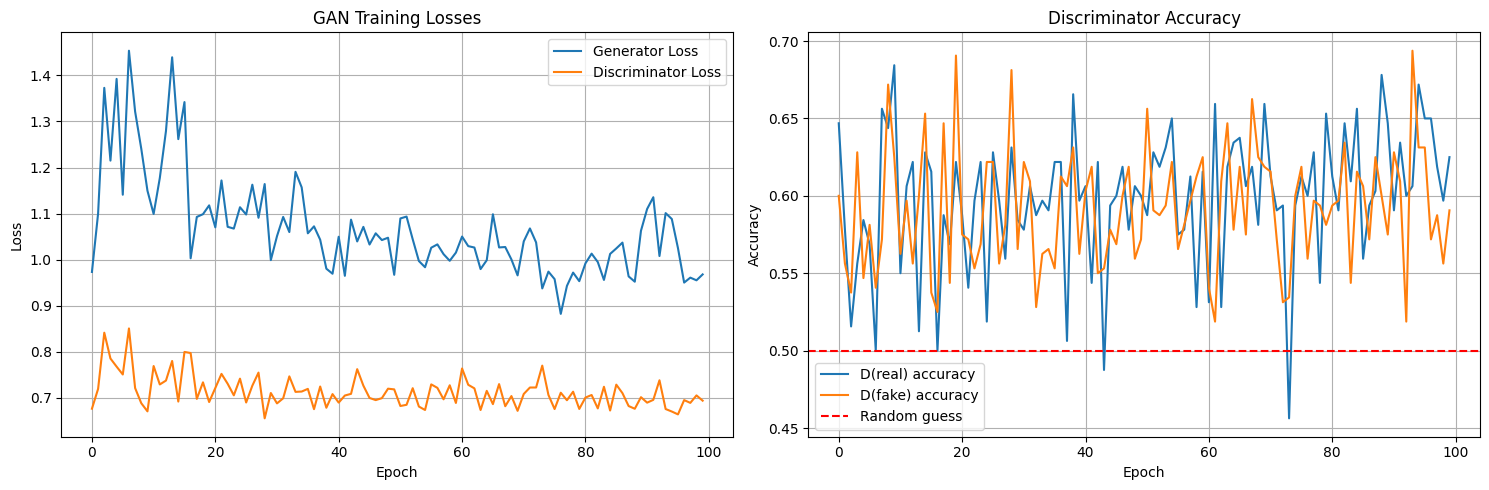

✓ Training plots saved: gan_training_history.png


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# Set random seeds
torch.manual_seed(42)
np.random.seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ============================
# 1. HYPERPARAMETERS
# ============================

config = {
    'latent_dim': 100,
    'num_classes': 7,
    'image_size': 128,
    'channels': 3,
    'batch_size': 32,
    'lr': 0.0002,
    'beta1': 0.5,
    'beta2': 0.999,
    'num_epochs': 100,
    'sample_interval': 500,  # Save samples every N iterations
}

# ============================
# 2. GENERATOR
# ============================

class Generator(nn.Module):
    def __init__(self, latent_dim, num_classes, channels):
        super(Generator, self).__init__()
        
        self.latent_dim = latent_dim
        self.num_classes = num_classes
        
        # Class embedding
        self.label_embedding = nn.Embedding(num_classes, num_classes)
        
        # Input: latent_dim + num_classes
        self.init_size = 4  # Initial spatial size
        self.fc = nn.Linear(latent_dim + num_classes, 512 * self.init_size * self.init_size)
        
        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(512),
            
            # 4x4 -> 8x8
            nn.Upsample(scale_factor=2),
            nn.Conv2d(512, 256, 3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            
            # 8x8 -> 16x16
            nn.Upsample(scale_factor=2),
            nn.Conv2d(256, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            
            # 16x16 -> 32x32
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            
            # 32x32 -> 64x64
            nn.Upsample(scale_factor=2),
            nn.Conv2d(64, 32, 3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            
            # 64x64 -> 128x128
            nn.Upsample(scale_factor=2),
            nn.Conv2d(32, channels, 3, stride=1, padding=1),
            nn.Tanh()
        )
    
    def forward(self, noise, labels):
        # Concatenate noise and label embedding
        label_input = self.label_embedding(labels)
        gen_input = torch.cat([noise, label_input], dim=1)
        
        # Generate image
        out = self.fc(gen_input)
        out = out.view(out.size(0), 512, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img

# ============================
# 3. DISCRIMINATOR
# ============================

class Discriminator(nn.Module):
    def __init__(self, num_classes, channels, image_size):
        super(Discriminator, self).__init__()
        
        self.num_classes = num_classes
        self.image_size = image_size
        
        # Class embedding - project to spatial dimensions
        self.label_embedding = nn.Embedding(num_classes, image_size * image_size)
        
        def discriminator_block(in_filters, out_filters, bn=True):
            block = [
                nn.Conv2d(in_filters, out_filters, 4, 2, 1),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout2d(0.25)
            ]
            if bn:
                block.append(nn.BatchNorm2d(out_filters))
            return block
        
        # Input: 4 channels (3 RGB + 1 class map)
        self.model = nn.Sequential(
            *discriminator_block(channels + 1, 64, bn=False),  # 128 -> 64
            *discriminator_block(64, 128),                      # 64 -> 32
            *discriminator_block(128, 256),                     # 32 -> 16
            *discriminator_block(256, 512),                     # 16 -> 8
        )
        
        # Output layer
        ds_size = image_size // 2**4  # 128 / 16 = 8
        self.adv_layer = nn.Sequential(
            nn.Linear(512 * ds_size * ds_size, 1),
            nn.Sigmoid()
        )
    
    def forward(self, img, labels):
        # Expand label embedding to match image spatial dimensions
        label_embedding = self.label_embedding(labels)
        label_embedding = label_embedding.view(labels.size(0), 1, self.image_size, self.image_size)
        
        # Concatenate image and label embedding
        d_in = torch.cat([img, label_embedding], dim=1)
        
        # Pass through convolutional layers
        out = self.model(d_in)
        out = out.view(out.size(0), -1)
        validity = self.adv_layer(out)
        
        return validity

# ============================
# 4. DATA LOADING FOR GAN
# ============================

class GANDataset(Dataset):
    """Dataset for GAN training - returns 128x128 images in [-1, 1] range"""
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'path']
        image = Image.open(img_path).convert('RGB')
        label = self.df.loc[idx, 'label']
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# GAN-specific transforms (output in [-1, 1] for tanh)
gan_transform = transforms.Compose([
    transforms.Resize((config['image_size'], config['image_size'])),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Scale to [-1, 1]
])

# Create GAN dataset (using same train_df from baseline)
gan_dataset = GANDataset(train_df, transform=gan_transform)
gan_loader = DataLoader(gan_dataset, batch_size=config['batch_size'], 
                        shuffle=True, num_workers=2, drop_last=True)

print(f"GAN training on {len(gan_dataset)} images")

# ============================
# 5. INITIALIZE MODELS
# ============================

generator = Generator(config['latent_dim'], config['num_classes'], config['channels']).to(device)
discriminator = Discriminator(config['num_classes'], config['channels'], config['image_size']).to(device)

# Weight initialization
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

generator.apply(weights_init)
discriminator.apply(weights_init)

# Loss and optimizers
adversarial_loss = nn.BCELoss()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=config['lr'], 
                               betas=(config['beta1'], config['beta2']))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=config['lr'], 
                               betas=(config['beta1'], config['beta2']))

print("\n=== Model Architecture ===")
print(f"Generator parameters: {sum(p.numel() for p in generator.parameters()):,}")
print(f"Discriminator parameters: {sum(p.numel() for p in discriminator.parameters()):,}")

# ============================
# 6. TRAINING LOOP
# ============================

# Create directory for saving samples
os.makedirs("gan_samples", exist_ok=True)

# Fixed noise for consistent sample generation
fixed_noise = torch.randn(config['num_classes'] * 8, config['latent_dim'], device=device)
fixed_labels = torch.tensor([i for i in range(config['num_classes']) for _ in range(8)], device=device)

# Training history
history = {
    'g_loss': [],
    'd_loss': [],
    'd_real_acc': [],
    'd_fake_acc': []
}

print("\n=== Starting GAN Training ===\n")

for epoch in range(config['num_epochs']):
    epoch_g_loss = 0
    epoch_d_loss = 0
    epoch_d_real_acc = 0
    epoch_d_fake_acc = 0
    
    pbar = tqdm(gan_loader, desc=f"Epoch {epoch+1}/{config['num_epochs']}")
    
    for i, (real_imgs, labels) in enumerate(pbar):
        batch_size = real_imgs.size(0)
        real_imgs = real_imgs.to(device)
        labels = labels.to(device)
        
        # Adversarial ground truths (with label smoothing)
        valid = torch.full((batch_size, 1), 0.9, device=device)
        fake = torch.full((batch_size, 1), 0.1, device=device)
        
        # ===========================
        # Train Discriminator
        # ===========================
        optimizer_D.zero_grad()
        
        # Real images
        real_pred = discriminator(real_imgs, labels)
        d_real_loss = adversarial_loss(real_pred, valid)
        
        # Fake images
        z = torch.randn(batch_size, config['latent_dim'], device=device)
        gen_labels = torch.randint(0, config['num_classes'], (batch_size,), device=device)
        fake_imgs = generator(z, gen_labels)
        fake_pred = discriminator(fake_imgs.detach(), gen_labels)
        d_fake_loss = adversarial_loss(fake_pred, fake)
        
        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()
        
        # ===========================
        # Train Generator
        # ===========================
        optimizer_G.zero_grad()
        
        # Generate fake images
        z = torch.randn(batch_size, config['latent_dim'], device=device)
        gen_labels = torch.randint(0, config['num_classes'], (batch_size,), device=device)
        gen_imgs = generator(z, gen_labels)
        
        # Generator wants discriminator to think images are real
        validity = discriminator(gen_imgs, gen_labels)
        g_loss = adversarial_loss(validity, valid)
        
        g_loss.backward()
        optimizer_G.step()
        
        # ===========================
        # Track metrics
        # ===========================
        epoch_g_loss += g_loss.item()
        epoch_d_loss += d_loss.item()
        epoch_d_real_acc += (real_pred > 0.5).float().mean().item()
        epoch_d_fake_acc += (fake_pred < 0.5).float().mean().item()
        
        # Update progress bar
        pbar.set_postfix({
            'D_loss': f"{d_loss.item():.4f}",
            'G_loss': f"{g_loss.item():.4f}",
            'D(x)': f"{real_pred.mean().item():.2f}",
            'D(G(z))': f"{fake_pred.mean().item():.2f}"
        })
        
        # Save sample images
        batches_done = epoch * len(gan_loader) + i
        if batches_done % config['sample_interval'] == 0:
            with torch.no_grad():
                gen_imgs = generator(fixed_noise, fixed_labels).detach().cpu()
            save_image(gen_imgs, f"gan_samples/epoch_{epoch}_batch_{batches_done}.png", 
                      nrow=8, normalize=True)
    
    # Epoch statistics
    n_batches = len(gan_loader)
    history['g_loss'].append(epoch_g_loss / n_batches)
    history['d_loss'].append(epoch_d_loss / n_batches)
    history['d_real_acc'].append(epoch_d_real_acc / n_batches)
    history['d_fake_acc'].append(epoch_d_fake_acc / n_batches)
    
    print(f"\nEpoch {epoch+1}/{config['num_epochs']}")
    print(f"G_loss: {history['g_loss'][-1]:.4f}, D_loss: {history['d_loss'][-1]:.4f}")
    print(f"D_real_acc: {history['d_real_acc'][-1]:.2%}, D_fake_acc: {history['d_fake_acc'][-1]:.2%}")
    print("-" * 70)
    
    # Save model checkpoint every 10 epochs
    if (epoch + 1) % 10 == 0:
        torch.save({
            'epoch': epoch,
            'generator_state_dict': generator.state_dict(),
            'discriminator_state_dict': discriminator.state_dict(),
            'optimizer_G_state_dict': optimizer_G.state_dict(),
            'optimizer_D_state_dict': optimizer_D.state_dict(),
        }, f'gan_checkpoint_epoch_{epoch+1}.pth')

# Save final model
torch.save(generator.state_dict(), 'generator_final.pth')
torch.save(discriminator.state_dict(), 'discriminator_final.pth')

print("\n✓ GAN training complete!")
print("✓ Models saved: generator_final.pth, discriminator_final.pth")

# ============================
# 7. PLOT TRAINING HISTORY
# ============================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
axes[0].plot(history['g_loss'], label='Generator Loss')
axes[0].plot(history['d_loss'], label='Discriminator Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('GAN Training Losses')
axes[0].legend()
axes[0].grid(True)

# Accuracy plot
axes[1].plot(history['d_real_acc'], label='D(real) accuracy')
axes[1].plot(history['d_fake_acc'], label='D(fake) accuracy')
axes[1].axhline(y=0.5, color='r', linestyle='--', label='Random guess')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Discriminator Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('gan_training_history.png', dpi=150)
plt.show()

print("✓ Training plots saved: gan_training_history.png")

✓ Generator loaded successfully

=== Synthetic Data Generation Strategy ===
nv (class 5): 0 synthetic samples
mel (class 4): 100 synthetic samples
bkl (class 2): 100 synthetic samples
bcc (class 1): 150 synthetic samples
akiec (class 0): 200 synthetic samples
vasc (class 6): 300 synthetic samples
df (class 3): 350 synthetic samples

=== Generating Synthetic Images ===

Generating 100 samples for class: mel


100%|██████████| 4/4 [00:00<00:00,  4.86it/s]



Generating 100 samples for class: bkl


100%|██████████| 4/4 [00:00<00:00,  4.56it/s]



Generating 150 samples for class: bcc


100%|██████████| 5/5 [00:01<00:00,  3.51it/s]



Generating 200 samples for class: akiec


100%|██████████| 7/7 [00:01<00:00,  4.18it/s]



Generating 300 samples for class: vasc


100%|██████████| 10/10 [00:02<00:00,  4.17it/s]



Generating 350 samples for class: df


100%|██████████| 11/11 [00:02<00:00,  3.81it/s]



✓ Generated 1200 synthetic images
✓ Synthetic metadata created: 1200 samples

=== Visualizing Synthetic Samples ===


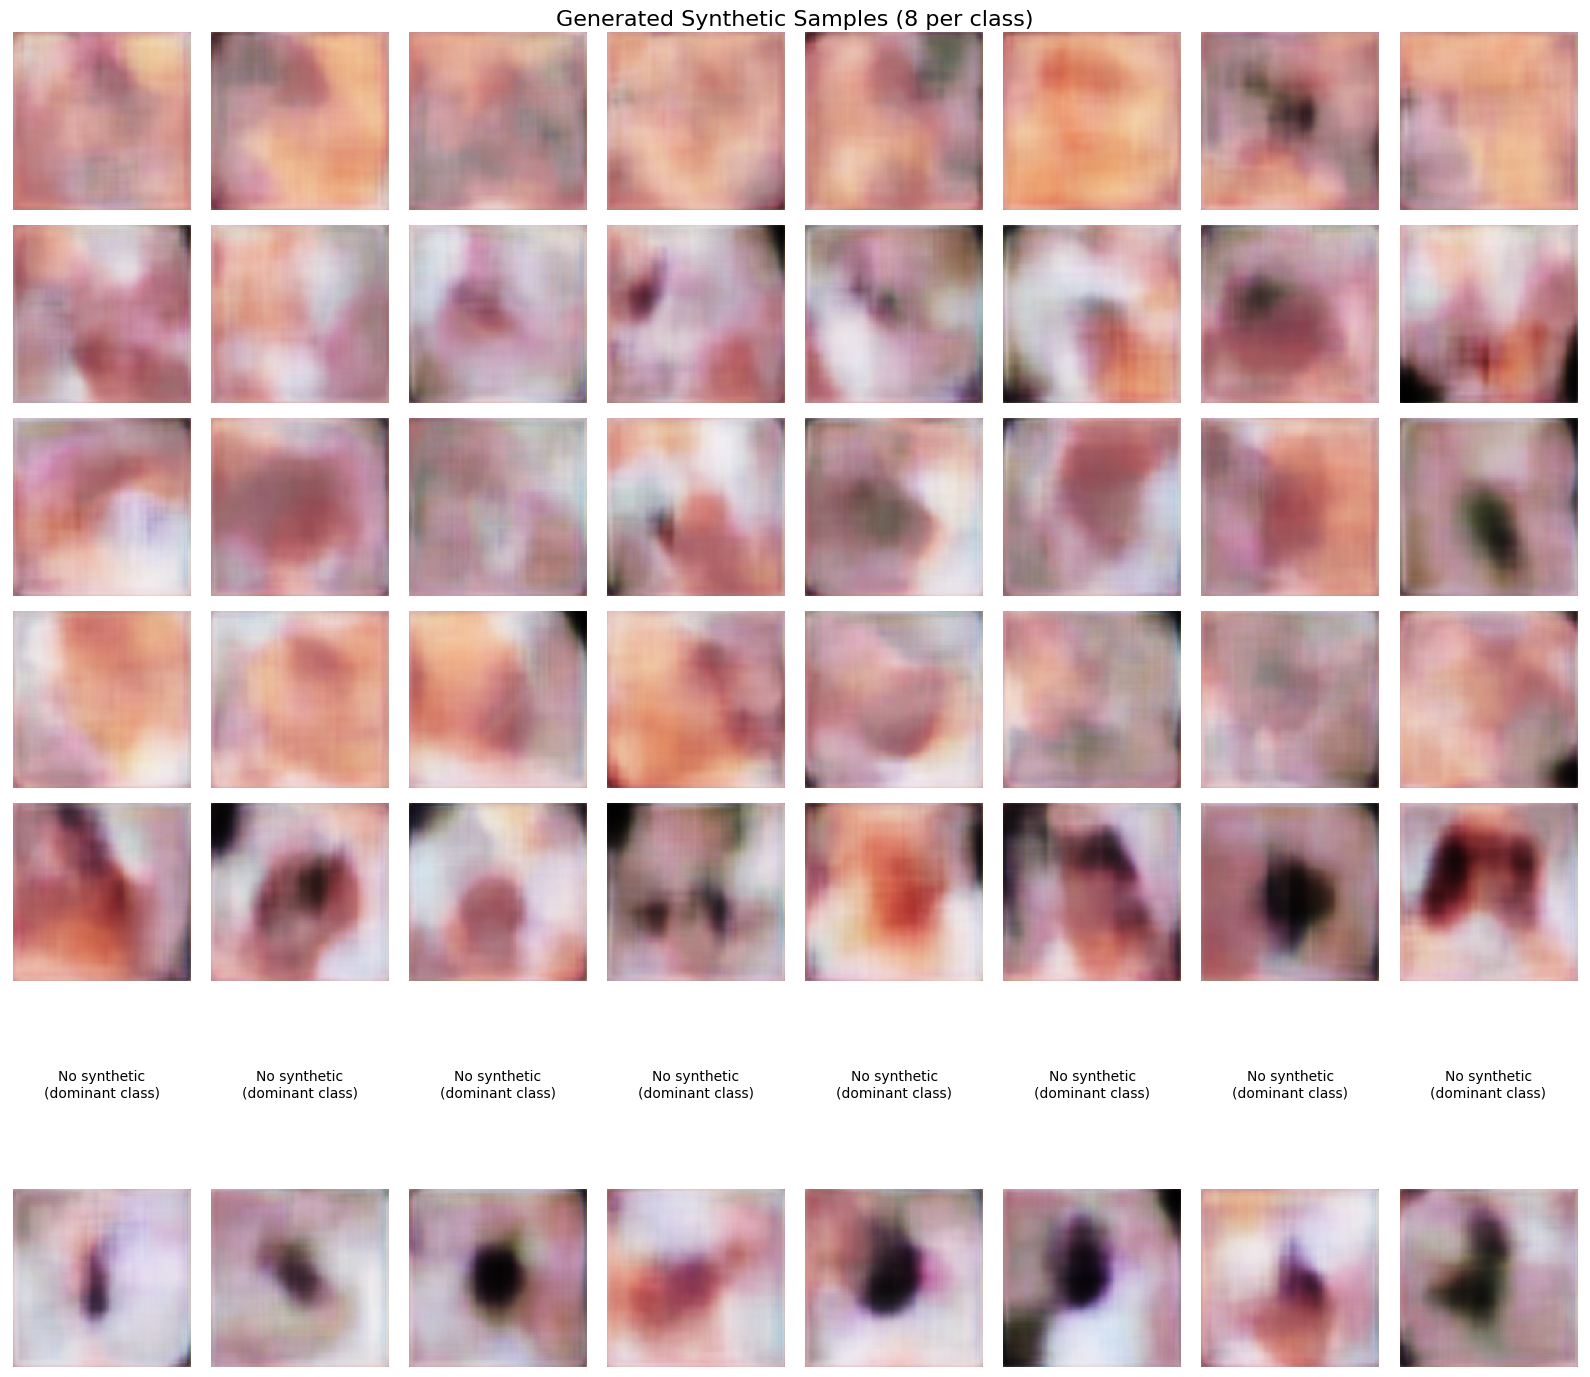

✓ Visualization saved: synthetic_samples_visualization.png

=== Augmented Training Set ===
Original training set: 350 images
Synthetic images: 1200 images
Augmented training set: 1550 images

Augmented class distribution:
dx
akiec    250
bcc      200
bkl      150
df       400
mel      150
nv        50
vasc     350
Name: count, dtype: int64

✓ Augmented metadata saved: augmented_train_metadata.csv


In [6]:
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
import os
from PIL import Image
import pandas as pd
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load trained generator
generator = Generator(config['latent_dim'], config['num_classes'], config['channels']).to(device)
generator.load_state_dict(torch.load('generator_final.pth'))
generator.eval()

print("✓ Generator loaded successfully")

# ============================
# SYNTHETIC DATA GENERATION
# ============================

# Strategy: Generate more samples for minority classes
# This balances the training set

generation_strategy = {
    'nv': 0,       # Already dominant - no augmentation
    'mel': 100,    # Augment moderately
    'bkl': 100,    # Augment moderately  
    'bcc': 150,    # Augment more
    'akiec': 200,  # Minority class - heavy augmentation
    'vasc': 300,   # Very rare - heavy augmentation
    'df': 350      # Rarest - maximum augmentation
}

print("\n=== Synthetic Data Generation Strategy ===")
for class_name, n_samples in generation_strategy.items():
    class_idx = class_to_idx[class_name]
    print(f"{class_name} (class {class_idx}): {n_samples} synthetic samples")

# Create directory for synthetic images
synthetic_dir = 'synthetic_images'
os.makedirs(synthetic_dir, exist_ok=True)

# Generate and save synthetic images
synthetic_metadata = []

print("\n=== Generating Synthetic Images ===")

for class_name, n_samples in generation_strategy.items():
    if n_samples == 0:
        continue
    
    class_idx = class_to_idx[class_name]
    class_dir = os.path.join(synthetic_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    
    print(f"\nGenerating {n_samples} samples for class: {class_name}")
    
    # Generate in batches
    batch_size = 32
    n_batches = (n_samples + batch_size - 1) // batch_size
    
    sample_count = 0
    
    for batch_idx in tqdm(range(n_batches)):
        # Determine batch size for this iteration
        current_batch_size = min(batch_size, n_samples - sample_count)
        
        # Generate random noise
        z = torch.randn(current_batch_size, config['latent_dim'], device=device)
        labels = torch.full((current_batch_size,), class_idx, dtype=torch.long, device=device)
        
        # Generate images
        with torch.no_grad():
            gen_imgs = generator(z, labels)
        
        # Save individual images
        for i in range(current_batch_size):
            img_tensor = gen_imgs[i].cpu()
            
            # Denormalize from [-1, 1] to [0, 1]
            img_tensor = (img_tensor + 1) / 2
            
            # Save image
            img_path = os.path.join(class_dir, f'synthetic_{class_name}_{sample_count:04d}.png')
            save_image(img_tensor, img_path)
            
            # Add to metadata
            synthetic_metadata.append({
                'image_id': f'synthetic_{class_name}_{sample_count:04d}',
                'dx': class_name,
                'label': class_idx,
                'path': img_path,
                'is_synthetic': True
            })
            
            sample_count += 1

print(f"\n✓ Generated {len(synthetic_metadata)} synthetic images")

# Create synthetic dataframe
synthetic_df = pd.DataFrame(synthetic_metadata)
print(f"✓ Synthetic metadata created: {len(synthetic_df)} samples")

# ============================
# VISUALIZE SYNTHETIC SAMPLES
# ============================

print("\n=== Visualizing Synthetic Samples ===")

fig, axes = plt.subplots(7, 8, figsize=(16, 14))
fig.suptitle('Generated Synthetic Samples (8 per class)', fontsize=16)

for class_idx, class_name in enumerate(idx_to_class.values()):
    if generation_strategy[class_name] == 0:
        # For nv (no synthetic), show message
        for j in range(8):
            axes[class_idx, j].text(0.5, 0.5, 'No synthetic\n(dominant class)', 
                                   ha='center', va='center')
            axes[class_idx, j].axis('off')
        axes[class_idx, 0].set_ylabel(class_name, fontsize=12, fontweight='bold')
        continue
    
    # Generate 8 samples for visualization
    z = torch.randn(8, config['latent_dim'], device=device)
    labels = torch.full((8,), class_idx, dtype=torch.long, device=device)
    
    with torch.no_grad():
        gen_imgs = generator(z, labels).cpu()
    
    for j in range(8):
        img = (gen_imgs[j] + 1) / 2  # Denormalize to [0, 1]
        img = img.permute(1, 2, 0).numpy()
        axes[class_idx, j].imshow(img)
        axes[class_idx, j].axis('off')
    
    axes[class_idx, 0].set_ylabel(class_name, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('synthetic_samples_visualization.png', dpi=150)
plt.show()

print("✓ Visualization saved: synthetic_samples_visualization.png")

# ============================
# CREATE AUGMENTED DATASET
# ============================

# Combine real training data with synthetic data
train_df['is_synthetic'] = False
augmented_train_df = pd.concat([train_df, synthetic_df], ignore_index=True)

print(f"\n=== Augmented Training Set ===")
print(f"Original training set: {len(train_df)} images")
print(f"Synthetic images: {len(synthetic_df)} images")
print(f"Augmented training set: {len(augmented_train_df)} images")

print("\nAugmented class distribution:")
print(augmented_train_df['dx'].value_counts().sort_index())

# Save augmented metadata
augmented_train_df.to_csv('augmented_train_metadata.csv', index=False)
print("\n✓ Augmented metadata saved: augmented_train_metadata.csv")


RETRAINING CLASSIFIER WITH AUGMENTED DATA (REAL + SYNTHETIC)

Augmented training set: 1550 images
Training batches per epoch: 49


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



=== Training Augmented Classifier ===



Validation: 100%|██████████| 151/151 [00:23<00:00,  6.41it/s]


Epoch 1/50
Train Loss: 1.3741, Train Acc: 48.77%
Val Loss: 1.1005, Val Acc: 56.52%
✓ Saved best model (Val Acc: 56.52%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.41it/s]


Epoch 2/50
Train Loss: 0.9156, Train Acc: 66.71%
Val Loss: 0.8408, Val Acc: 64.65%
✓ Saved best model (Val Acc: 64.65%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.32it/s]


Epoch 3/50
Train Loss: 0.7244, Train Acc: 73.35%
Val Loss: 0.8474, Val Acc: 67.40%
✓ Saved best model (Val Acc: 67.40%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.40it/s]


Epoch 4/50
Train Loss: 0.6435, Train Acc: 77.03%
Val Loss: 0.9339, Val Acc: 63.95%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.51it/s]


Epoch 5/50
Train Loss: 0.5473, Train Acc: 81.29%
Val Loss: 1.8830, Val Acc: 52.28%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.35it/s]


Epoch 6/50
Train Loss: 0.4773, Train Acc: 83.55%
Val Loss: 1.0246, Val Acc: 66.37%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.33it/s]


Epoch 7/50
Train Loss: 0.4507, Train Acc: 84.13%
Val Loss: 1.1072, Val Acc: 62.71%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.36it/s]


Epoch 8/50
Train Loss: 0.3830, Train Acc: 86.52%
Val Loss: 1.1765, Val Acc: 65.42%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.51it/s]


Epoch 9/50
Train Loss: 0.3577, Train Acc: 87.68%
Val Loss: 1.2556, Val Acc: 62.15%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.31it/s]


Epoch 10/50
Train Loss: 0.3184, Train Acc: 88.71%
Val Loss: 1.3769, Val Acc: 66.10%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.51it/s]


Epoch 11/50
Train Loss: 0.3283, Train Acc: 89.10%
Val Loss: 0.8625, Val Acc: 70.32%
✓ Saved best model (Val Acc: 70.32%)
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.44it/s]


Epoch 12/50
Train Loss: 0.3260, Train Acc: 88.26%
Val Loss: 1.3300, Val Acc: 63.91%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.46it/s]


Epoch 13/50
Train Loss: 0.2752, Train Acc: 91.81%
Val Loss: 1.1268, Val Acc: 66.54%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.43it/s]


Epoch 14/50
Train Loss: 0.2198, Train Acc: 92.19%
Val Loss: 1.7153, Val Acc: 60.18%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.40it/s]


Epoch 15/50
Train Loss: 0.2047, Train Acc: 92.90%
Val Loss: 1.2769, Val Acc: 65.11%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.35it/s]


Epoch 16/50
Train Loss: 0.1876, Train Acc: 93.87%
Val Loss: 1.1363, Val Acc: 67.78%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.52it/s]


Epoch 17/50
Train Loss: 0.2040, Train Acc: 93.87%
Val Loss: 0.9708, Val Acc: 69.56%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.44it/s]


Epoch 18/50
Train Loss: 0.1611, Train Acc: 94.65%
Val Loss: 1.1603, Val Acc: 66.80%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.38it/s]


Epoch 19/50
Train Loss: 0.1616, Train Acc: 94.26%
Val Loss: 1.5357, Val Acc: 63.14%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.36it/s]


Epoch 20/50
Train Loss: 0.1739, Train Acc: 94.06%
Val Loss: 1.5266, Val Acc: 64.32%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.42it/s]


Epoch 21/50
Train Loss: 0.1518, Train Acc: 94.90%
Val Loss: 1.1879, Val Acc: 68.87%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.46it/s]


Epoch 22/50
Train Loss: 0.1606, Train Acc: 94.84%
Val Loss: 2.0738, Val Acc: 59.19%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.31it/s]


Epoch 23/50
Train Loss: 0.0934, Train Acc: 96.65%
Val Loss: 2.2423, Val Acc: 55.82%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.27it/s]


Epoch 24/50
Train Loss: 0.1303, Train Acc: 95.16%
Val Loss: 1.9298, Val Acc: 61.28%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.29it/s]


Epoch 25/50
Train Loss: 0.0992, Train Acc: 96.26%
Val Loss: 1.3562, Val Acc: 67.61%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.30it/s]


Epoch 26/50
Train Loss: 0.0964, Train Acc: 96.84%
Val Loss: 1.5149, Val Acc: 66.16%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.41it/s]


Epoch 27/50
Train Loss: 0.1013, Train Acc: 96.58%
Val Loss: 1.5091, Val Acc: 63.43%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.26it/s]


Epoch 28/50
Train Loss: 0.1320, Train Acc: 95.48%
Val Loss: 1.4988, Val Acc: 66.76%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.44it/s]


Epoch 29/50
Train Loss: 0.1339, Train Acc: 96.45%
Val Loss: 1.4488, Val Acc: 63.16%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.33it/s]


Epoch 30/50
Train Loss: 0.0854, Train Acc: 97.10%
Val Loss: 1.5182, Val Acc: 64.76%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.28it/s]


Epoch 31/50
Train Loss: 0.0778, Train Acc: 97.23%
Val Loss: 1.7865, Val Acc: 61.73%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.39it/s]


Epoch 32/50
Train Loss: 0.0697, Train Acc: 97.68%
Val Loss: 1.7104, Val Acc: 63.82%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.45it/s]


Epoch 33/50
Train Loss: 0.0749, Train Acc: 97.74%
Val Loss: 2.2808, Val Acc: 55.63%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.51it/s]


Epoch 34/50
Train Loss: 0.1315, Train Acc: 96.45%
Val Loss: 1.6201, Val Acc: 62.69%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.39it/s]


Epoch 35/50
Train Loss: 0.1213, Train Acc: 96.13%
Val Loss: 1.8220, Val Acc: 59.79%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.51it/s]


Epoch 36/50
Train Loss: 0.1252, Train Acc: 96.06%
Val Loss: 1.4032, Val Acc: 65.69%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.50it/s]


Epoch 37/50
Train Loss: 0.0906, Train Acc: 96.97%
Val Loss: 1.5977, Val Acc: 64.18%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.42it/s]


Epoch 38/50
Train Loss: 0.0631, Train Acc: 97.87%
Val Loss: 1.9766, Val Acc: 61.26%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.41it/s]


Epoch 39/50
Train Loss: 0.0554, Train Acc: 98.13%
Val Loss: 1.7707, Val Acc: 62.54%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.44it/s]


Epoch 40/50
Train Loss: 0.0859, Train Acc: 97.48%
Val Loss: 1.6547, Val Acc: 63.02%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.32it/s]


Epoch 41/50
Train Loss: 0.0705, Train Acc: 97.29%
Val Loss: 2.1068, Val Acc: 60.26%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.53it/s]


Epoch 42/50
Train Loss: 0.0614, Train Acc: 98.19%
Val Loss: 1.3683, Val Acc: 67.26%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.50it/s]


Epoch 43/50
Train Loss: 0.0536, Train Acc: 98.13%
Val Loss: 2.0511, Val Acc: 61.51%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.53it/s]


Epoch 44/50
Train Loss: 0.0605, Train Acc: 98.52%
Val Loss: 1.5503, Val Acc: 65.67%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.45it/s]


Epoch 45/50
Train Loss: 0.0430, Train Acc: 98.19%
Val Loss: 1.6456, Val Acc: 64.20%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.37it/s]


Epoch 46/50
Train Loss: 0.0480, Train Acc: 98.58%
Val Loss: 1.9205, Val Acc: 63.08%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:24<00:00,  6.26it/s]


Epoch 47/50
Train Loss: 0.0498, Train Acc: 98.45%
Val Loss: 1.9724, Val Acc: 60.68%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.45it/s]


Epoch 48/50
Train Loss: 0.0640, Train Acc: 98.00%
Val Loss: 1.9475, Val Acc: 62.73%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.37it/s]


Epoch 49/50
Train Loss: 0.0513, Train Acc: 98.26%
Val Loss: 1.9747, Val Acc: 62.38%
--------------------------------------------------


Validation: 100%|██████████| 151/151 [00:23<00:00,  6.51it/s]


Epoch 50/50
Train Loss: 0.0436, Train Acc: 98.65%
Val Loss: 1.9657, Val Acc: 61.92%
--------------------------------------------------

=== Training Complete ===
Best Validation Accuracy: 70.32%

AUGMENTED MODEL EVALUATION


Testing: 100%|██████████| 152/152 [00:23<00:00,  6.45it/s]



=== Test Set Evaluation ===

              precision    recall  f1-score   support

       akiec       0.27      0.44      0.34       138
         bcc       0.47      0.64      0.54       232
         bkl       0.35      0.37      0.36       525
          df       0.10      0.69      0.18        32
         mel       0.42      0.31      0.36       532
          nv       0.90      0.83      0.86      3328
        vasc       0.50      0.72      0.59        46

    accuracy                           0.70      4833
   macro avg       0.43      0.57      0.46      4833
weighted avg       0.74      0.70      0.72      4833



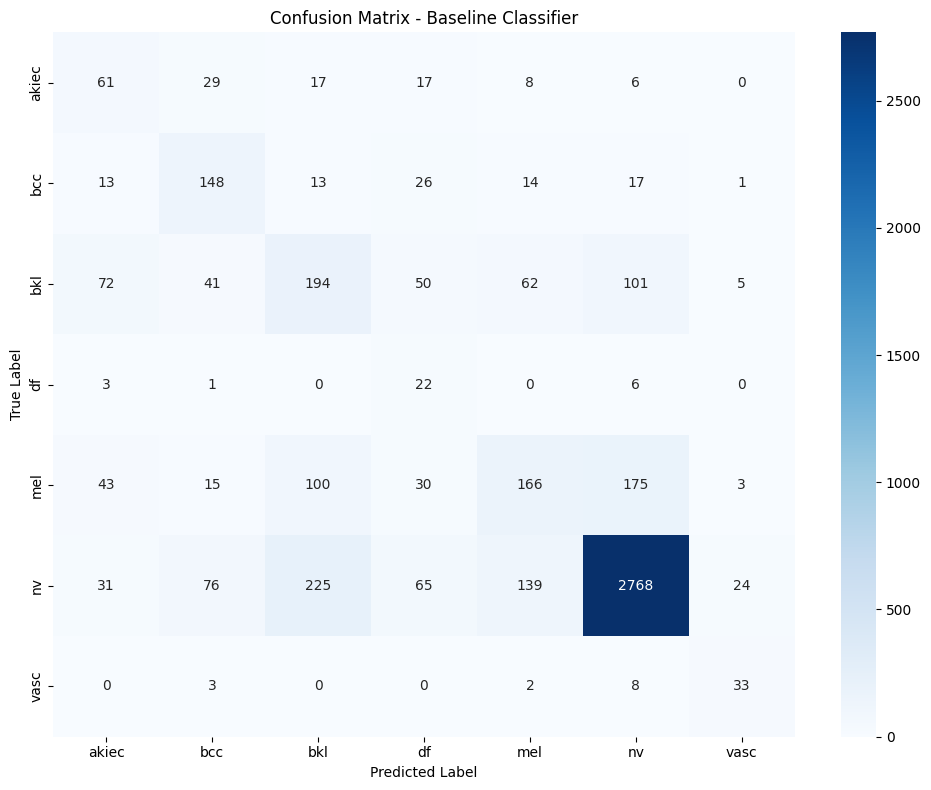


PERFORMANCE COMPARISON: BASELINE VS AUGMENTED

Getting baseline predictions...


Getting predictions: 100%|██████████| 152/152 [00:23<00:00,  6.39it/s]


Getting augmented model predictions...


Getting predictions: 100%|██████████| 152/152 [00:23<00:00,  6.54it/s]



=== BASELINE MODEL ===

=== AUGMENTED MODEL ===

PER-CLASS F1-SCORE COMPARISON
Class Baseline F1 Augmented F1 Improvement Improvement %
akiec       0.438        0.338      -0.100        -22.8%
  bcc       0.524        0.543      +0.019         +3.7%
  bkl       0.448        0.361      -0.087        -19.4%
   df       0.302        0.182      -0.120        -39.7%
  mel       0.417        0.360      -0.058        -13.8%
   nv       0.835        0.864      +0.028         +3.4%
 vasc       0.406        0.589      +0.183        +45.2%

OVERALL ACCURACY COMPARISON
Baseline Accuracy:  0.6830 (68.30%)
Augmented Accuracy: 0.7018 (70.18%)
Improvement:        +0.0188 (+1.88%)


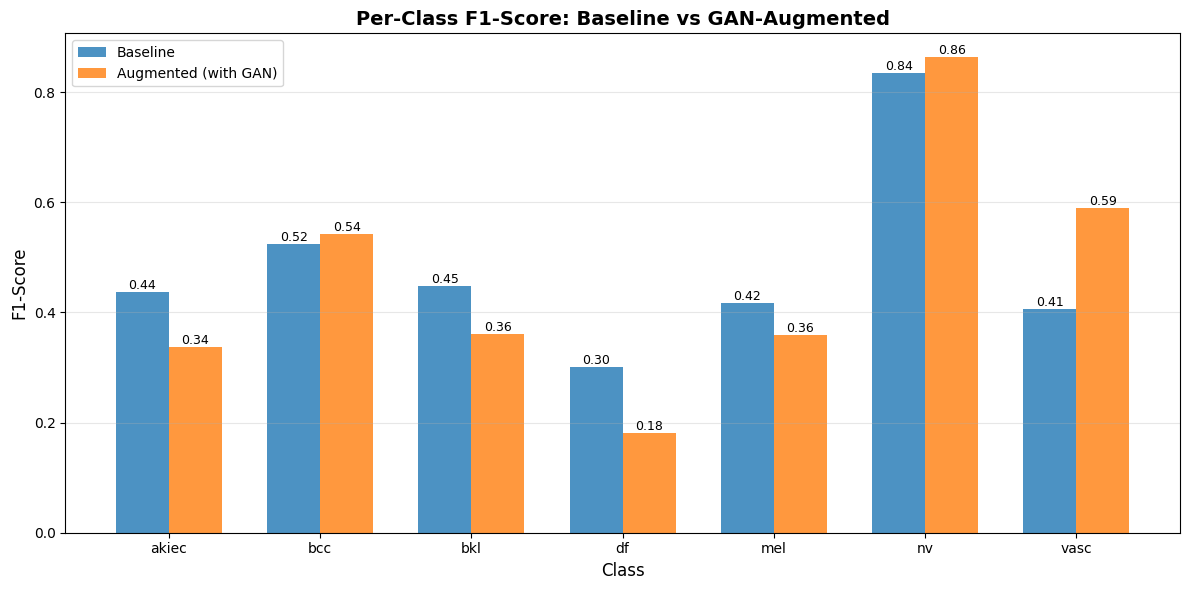


✓ Comparison plot saved: f1_comparison_baseline_vs_augmented.png
✓ Results summary saved: results_summary.json

PROJECT COMPLETE! 🎉


In [8]:
# ============================
# RETRAIN CLASSIFIER WITH AUGMENTED DATA
# ============================

print("\n" + "="*70)
print("RETRAINING CLASSIFIER WITH AUGMENTED DATA (REAL + SYNTHETIC)")
print("="*70 + "\n")

# Create augmented dataset
augmented_train_dataset = HAM10000Dataset(augmented_train_df, transform=train_transform)
augmented_train_loader = DataLoader(augmented_train_dataset, batch_size=32, 
                                   shuffle=True, num_workers=2)

print(f"Augmented training set: {len(augmented_train_dataset)} images")
print(f"Training batches per epoch: {len(augmented_train_loader)}")

# Create new model (fresh ResNet18)
model_augmented = models.resnet18(pretrained=True)
model_augmented.fc = nn.Linear(model_augmented.fc.in_features, num_classes)
model_augmented = model_augmented.to(device)

# Add this before training augmented classifier
from collections import Counter

# Calculate class weights
class_counts = augmented_train_df['dx'].value_counts().sort_index().values
class_weights = torch.FloatTensor([len(augmented_train_df) / (len(class_counts) * count) 
                                    for count in class_counts]).to(device)

# Use weighted loss
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer_aug = torch.optim.Adam(model_augmented.parameters(), lr=1e-4)

# Training
num_epochs = 50
best_val_acc_aug = 0.0

history_aug = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

print("\n=== Training Augmented Classifier ===\n")

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model_augmented, augmented_train_loader, 
                                       criterion, optimizer_aug, device)
    val_loss, val_acc = validate(model_augmented, val_loader, criterion, device)
    
    history_aug['train_loss'].append(train_loss)
    history_aug['train_acc'].append(train_acc)
    history_aug['val_loss'].append(val_loss)
    history_aug['val_acc'].append(val_acc)
    
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Save best model
    if val_acc > best_val_acc_aug:
        best_val_acc_aug = val_acc
        torch.save(model_augmented.state_dict(), 'best_augmented_model.pth')
        print(f"✓ Saved best model (Val Acc: {val_acc:.2f}%)")
    
    print("-" * 50)

print(f"\n=== Training Complete ===")
print(f"Best Validation Accuracy: {best_val_acc_aug:.2f}%")

# ============================
# EVALUATION - AUGMENTED MODEL
# ============================

# Load best model
model_augmented.load_state_dict(torch.load('best_augmented_model.pth'))

print("\n" + "="*70)
print("AUGMENTED MODEL EVALUATION")
print("="*70)

evaluate_model(model_augmented, test_loader, device, class_names)

# ============================
# COMPARISON: BASELINE VS AUGMENTED
# ============================

print("\n" + "="*70)
print("PERFORMANCE COMPARISON: BASELINE VS AUGMENTED")
print("="*70)

# Get predictions from both models
model.load_state_dict(torch.load('best_baseline_model.pth'))
model.eval()
model_augmented.eval()

def get_predictions(model, loader, device):
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Getting predictions"):
            images = images.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            _, predicted = outputs.max(1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())
            all_probs.extend(probs.cpu().numpy())
    
    return np.array(all_labels), np.array(all_preds), np.array(all_probs)

print("\nGetting baseline predictions...")
labels_test, preds_baseline, probs_baseline = get_predictions(model, test_loader, device)

print("Getting augmented model predictions...")
_, preds_augmented, probs_augmented = get_predictions(model_augmented, test_loader, device)

# Compare per-class performance
from sklearn.metrics import classification_report, accuracy_score, f1_score

print("\n=== BASELINE MODEL ===")
report_baseline = classification_report(labels_test, preds_baseline, 
                                       target_names=class_names, output_dict=True)
baseline_acc = accuracy_score(labels_test, preds_baseline)

print("\n=== AUGMENTED MODEL ===")
report_augmented = classification_report(labels_test, preds_augmented, 
                                        target_names=class_names, output_dict=True)
augmented_acc = accuracy_score(labels_test, preds_augmented)

# Create comparison table
comparison_data = []
for class_name in class_names:
    baseline_f1 = report_baseline[class_name]['f1-score']
    augmented_f1 = report_augmented[class_name]['f1-score']
    improvement = augmented_f1 - baseline_f1
    
    comparison_data.append({
        'Class': class_name,
        'Baseline F1': f"{baseline_f1:.3f}",
        'Augmented F1': f"{augmented_f1:.3f}",
        'Improvement': f"{improvement:+.3f}",
        'Improvement %': f"{(improvement/baseline_f1)*100:+.1f}%" if baseline_f1 > 0 else "N/A"
    })

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*70)
print("PER-CLASS F1-SCORE COMPARISON")
print("="*70)
print(comparison_df.to_string(index=False))

print("\n" + "="*70)
print(f"OVERALL ACCURACY COMPARISON")
print("="*70)
print(f"Baseline Accuracy:  {baseline_acc:.4f} ({baseline_acc*100:.2f}%)")
print(f"Augmented Accuracy: {augmented_acc:.4f} ({augmented_acc*100:.2f}%)")
print(f"Improvement:        {(augmented_acc - baseline_acc):+.4f} ({(augmented_acc - baseline_acc)*100:+.2f}%)")

# Visualization: F1 comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(class_names))
width = 0.35

baseline_f1_scores = [report_baseline[c]['f1-score'] for c in class_names]
augmented_f1_scores = [report_augmented[c]['f1-score'] for c in class_names]

bars1 = ax.bar(x - width/2, baseline_f1_scores, width, label='Baseline', alpha=0.8)
bars2 = ax.bar(x + width/2, augmented_f1_scores, width, label='Augmented (with GAN)', alpha=0.8)

ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('Per-Class F1-Score: Baseline vs GAN-Augmented', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('f1_comparison_baseline_vs_augmented.png', dpi=150)
plt.show()

print("\n✓ Comparison plot saved: f1_comparison_baseline_vs_augmented.png")

# Save results summary
results_summary = {
    'baseline_accuracy': baseline_acc,
    'augmented_accuracy': augmented_acc,
    'improvement': augmented_acc - baseline_acc,
    'per_class_comparison': comparison_df.to_dict('records')
}

import json
with open('results_summary.json', 'w') as f:
    json.dump(results_summary, f, indent=4)

print("✓ Results summary saved: results_summary.json")

print("\n" + "="*70)
print("PROJECT COMPLETE! 🎉")
print("="*70)